https://data.europa.eu/euodp/pl/data/dataset/covid-19-coronavirus-data

https://opendata.ecdc.europa.eu/covid19/casedistribution/csv

In [48]:
import pandas as pd

In [49]:
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

In [50]:
df = pd.read_csv(url,
                )
#                  parse_dates=['dateRep'])

In [51]:
df['dateRep'] = pd.to_datetime(df.dateRep, format='%d/%m/%Y')

In [52]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12801 entries, 0 to 12800
Data columns (total 11 columns):
dateRep                    12801 non-null datetime64[ns]
day                        12801 non-null int64
month                      12801 non-null int64
year                       12801 non-null int64
cases                      12801 non-null int64
deaths                     12801 non-null int64
countriesAndTerritories    12801 non-null object
geoId                      12760 non-null object
countryterritoryCode       12664 non-null object
popData2018                12694 non-null float64
continentExp               12801 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [54]:
df_with_null = df[df[df.columns].isnull().any(axis=1)]
print(df_with_null.countriesAndTerritories.value_counts())
print(df_with_null.shape[0])
df_with_null.sample(5)

Cases_on_an_international_conveyance_Japan    64
Namibia                                       41
Eritrea                                       34
Anguilla                                      29
Bonaire, Saint Eustatius and Saba             23
Falkland_Islands_(Malvinas)                   21
Name: countriesAndTerritories, dtype: int64
212


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
8181,2020-04-06,6,4,2020,2,0,Namibia,NaN,NAM,2448255.0,Africa
8201,2020-03-17,17,3,2020,0,0,Namibia,NaN,NAM,2448255.0,Africa
1596,2020-04-11,11,4,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,NaN,America
4013,2020-04-17,17,4,2020,0,0,Falkland_Islands_(Malvinas),FK,NaN,NaN,America
3788,2020-04-14,14,4,2020,0,0,Eritrea,ER,ERI,NaN,Africa


In [55]:
df.isnull().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       41
countryterritoryCode       137
popData2018                107
continentExp                 0
dtype: int64

In [56]:
df.countriesAndTerritories.nunique()

206

In [57]:
df[df['dateRep'] == '23/04/2020']['dateRep'].count()

205

In [58]:
df.dateRep.min(), df.dateRep.max()

(Timestamp('2019-12-31 00:00:00'), Timestamp('2020-04-24 00:00:00'))

In [59]:
df.groupby('countriesAndTerritories').dateRep.count().sort_values(ascending=False).values

array([116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116,
       116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 115, 115,
       115, 115, 114, 114, 114, 114, 114, 113, 113, 113, 113, 112, 112,
       112, 112, 112, 112, 111, 111, 111, 111, 110, 110, 109, 109, 109,
       109, 108, 108, 107, 107, 107, 107, 107, 107, 107, 106, 105, 104,
       103,  64,  53,  51,  50,  50,  50,  50,  49,  49,  48,  48,  48,
        48,  47,  47,  47,  46,  46,  46,  46,  46,  46,  46,  46,  45,
        45,  45,  44,  44,  43,  43,  43,  43,  43,  43,  43,  43,  42,
        42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        41,  40,  40,  40,  40,  40,  39,  39,  39,  39,  38,  38,  38,
        38,  37,  37,  37,  37,  37,  37,  37,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  35,  35,  35,  35,  35,
        35,  35,  34,  34,  34,  34,  34,  33,  33,  33,  33,  3

In [76]:
df.loc[df.countriesAndTerritories == 'Poland'].loc[df.dateRep <= '2020-04-24']['cases'].sum()


10511

In [87]:
df.loc[df['countriesAndTerritories'].isin(['Cases_on_an_international_conveyance_Japan'])]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cum_cases,cum_deaths
2277,2020-03-10,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,696,7
2278,2020-03-02,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,705,6
2279,2020-03-01,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,705,6
2280,2020-02-29,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,705,6
2281,2020-02-28,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,705,4
2282,2020-02-27,27,2,2020,14,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,705,4
2283,2020-02-26,26,2,2020,0,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,691,4
2284,2020-02-25,25,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,691,3
2285,2020-02-24,24,2,2020,57,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,691,3
2286,2020-02-23,23,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,634,2


In [61]:
df.loc[df['countriesAndTerritories'].isin(['Poland'])].loc[df.dateRep <= '2020-04-23']['deaths'].sum()

426

In [62]:
%%time
df['cum_cases'] = df[ ['countriesAndTerritories', 'dateRep', 'cases'] ]\
          .apply(lambda x: 
                 df.loc[df.countriesAndTerritories == x['countriesAndTerritories']]
                   .loc[df.dateRep <= x['dateRep']]
                 ['cases'].sum(), axis=1)   

Wall time: 30.3 s


In [63]:
%%time
df['cum_deaths'] = df[ ['countriesAndTerritories', 'dateRep', 'deaths'] ]\
          .apply(lambda x: 
                 df.loc[df.countriesAndTerritories == x['countriesAndTerritories']]
                   .loc[df.dateRep <= x['dateRep']]
                 ['deaths'].sum(), axis=1)  

Wall time: 30.2 s


In [64]:
df_pol = df[df['countriesAndTerritories'] == 'Poland'].set_index('dateRep')
df_pol.shape

(50, 12)

In [65]:
df_pol.tail()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cum_cases,cum_deaths
dateRep,,,,,,,,,,,,
2020-03-10,10,3,2020,6,0,Poland,PL,POL,37978548.0,Europe,17,0
2020-03-09,9,3,2020,5,0,Poland,PL,POL,37978548.0,Europe,11,0
2020-03-08,8,3,2020,1,0,Poland,PL,POL,37978548.0,Europe,6,0
2020-03-07,7,3,2020,4,0,Poland,PL,POL,37978548.0,Europe,5,0
2020-03-04,4,3,2020,1,0,Poland,PL,POL,37978548.0,Europe,1,0


In [66]:
df_pol.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cum_cases,cum_deaths
dateRep,,,,,,,,,,,,
2020-04-24,24,4,2020,342,28,Poland,PL,POL,37978548.0,Europe,10511,454
2020-04-23,23,4,2020,313,25,Poland,PL,POL,37978548.0,Europe,10169,426
2020-04-22,22,4,2020,263,21,Poland,PL,POL,37978548.0,Europe,9856,401
2020-04-21,21,4,2020,306,20,Poland,PL,POL,37978548.0,Europe,9593,380
2020-04-20,20,4,2020,545,13,Poland,PL,POL,37978548.0,Europe,9287,360


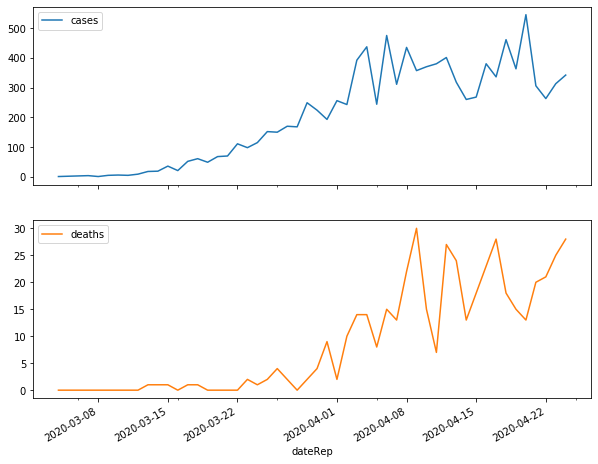

In [67]:
df_pol[['cases', 'deaths']].plot(subplots=True, layout=(2,1), figsize=(10,8));

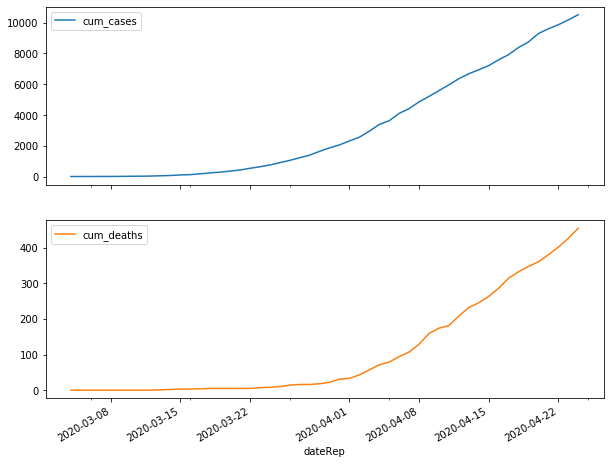

In [68]:
df_pol[['cum_cases', 'cum_deaths']].plot(subplots=True, layout=(2,1), figsize=(10,8));

In [69]:
def plot_country(name, logaritmic=False):
    df_country = df[df['countriesAndTerritories'] == name].set_index('dateRep')
    df_country[['cases', 'deaths']].plot(subplots=True, layout=(2,1), figsize=(10,8));
    df_country[['cum_cases', 'cum_deaths']].plot(subplots=True, layout=(2,1), figsize=(10,8));

In [70]:
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czechia', 'Democratic_Republic_of_the_Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador',
       'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',


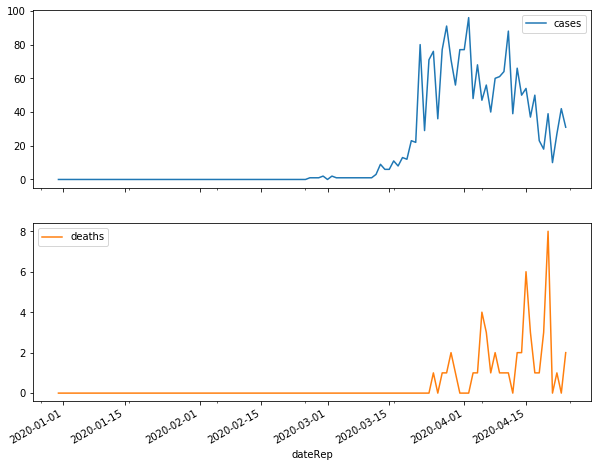

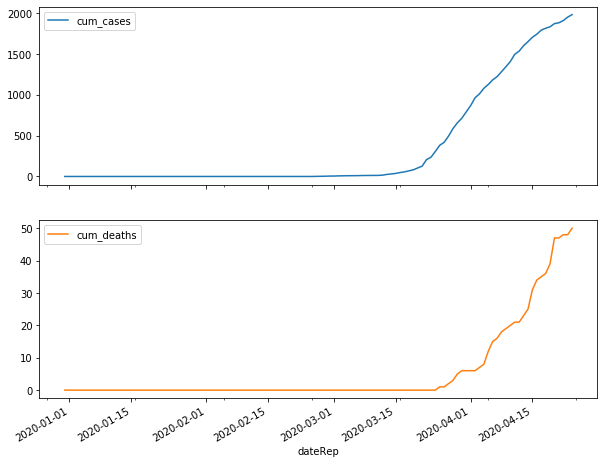

In [89]:
plot_country('Croatia')

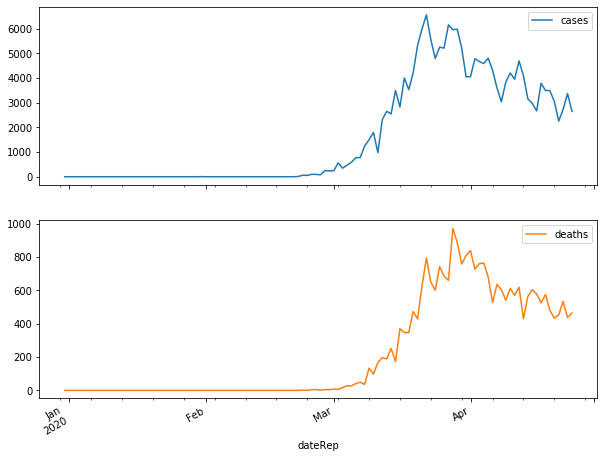

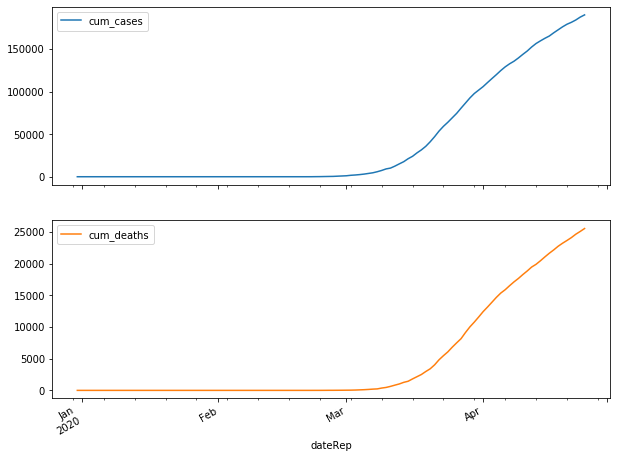

In [71]:
plot_country('Italy')

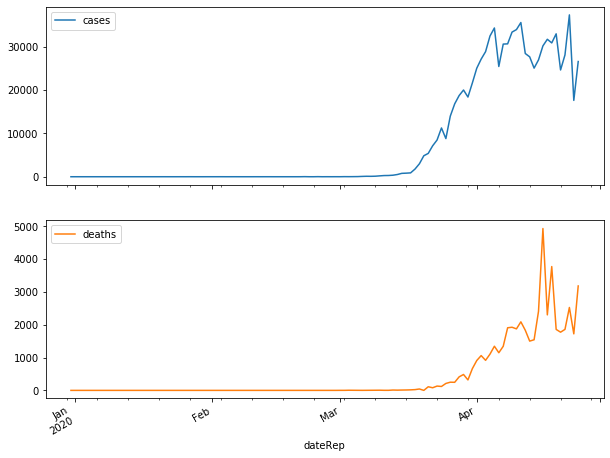

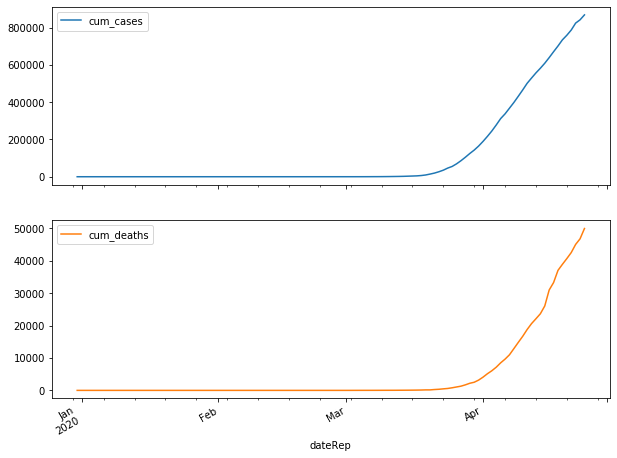

In [72]:
plot_country('United_States_of_America')

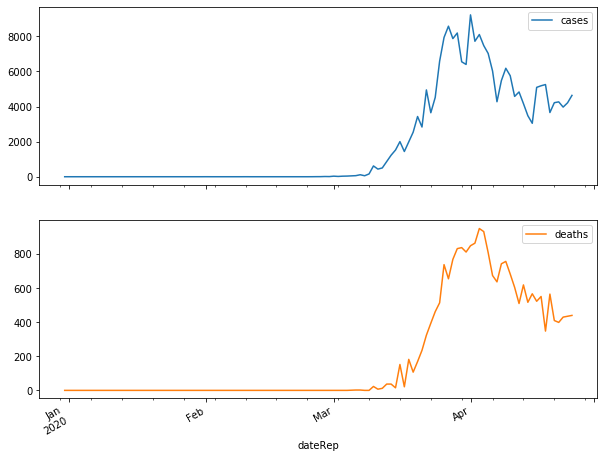

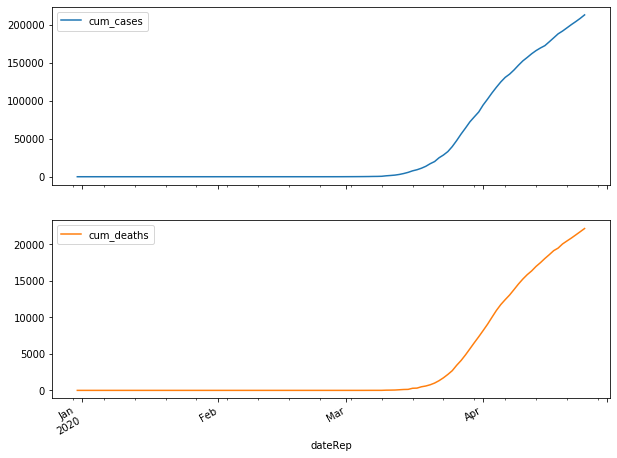

In [73]:
plot_country('Spain')

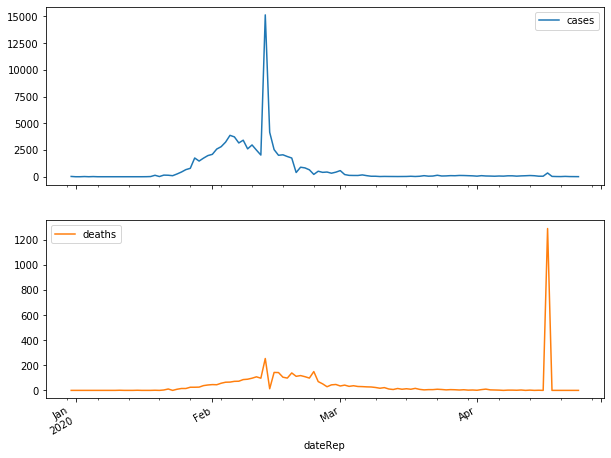

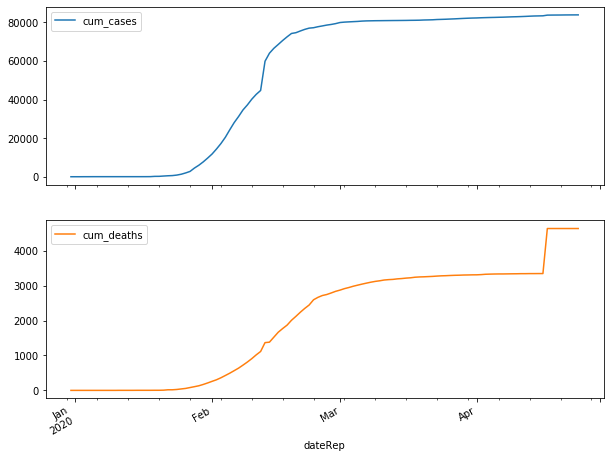

In [74]:
plot_country('China')

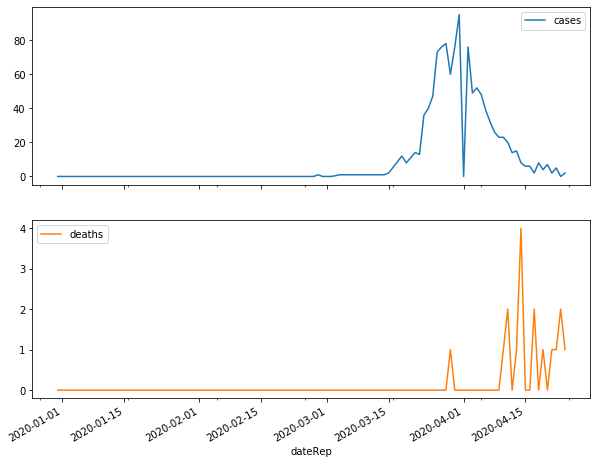

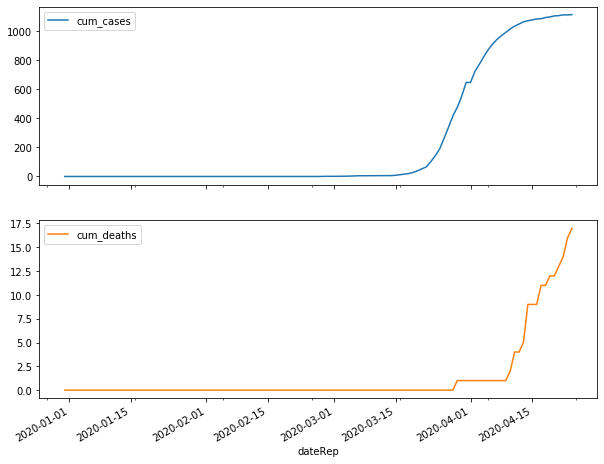

In [75]:
plot_country('New_Zealand')

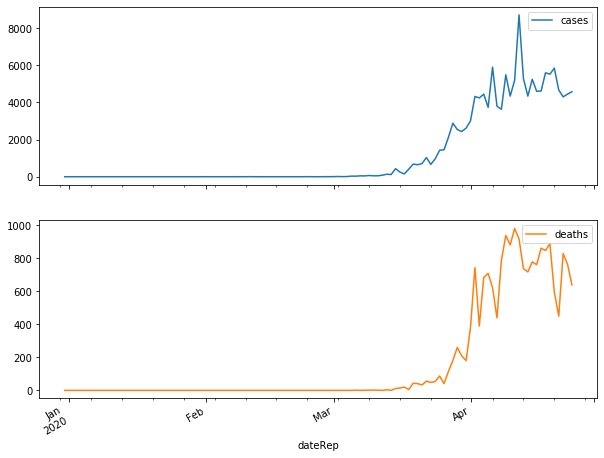

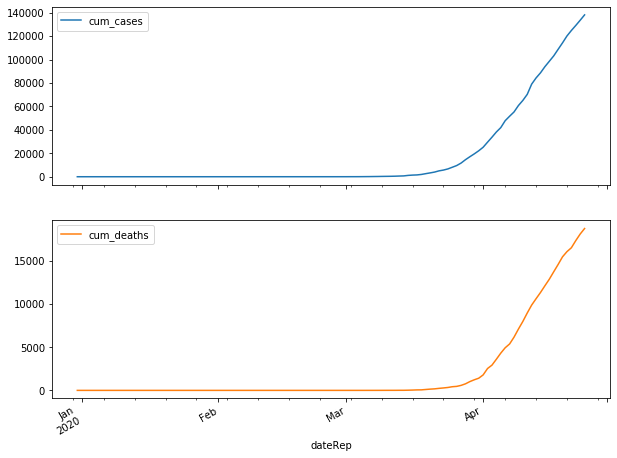

In [80]:
plot_country('United_Kingdom')